# U.S. Medical Insurance Costs

In [6]:
#SET UP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Data summary 
df.info()

print('Missing Values')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Missing Values


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Cleaning And Preparation

In [10]:
#Convert categorical columns to category type
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Descriptive Statistics and Data Visualization

In [11]:
df.describe() #Basic statistics for numeric columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Univariate Analysis - Count Variable

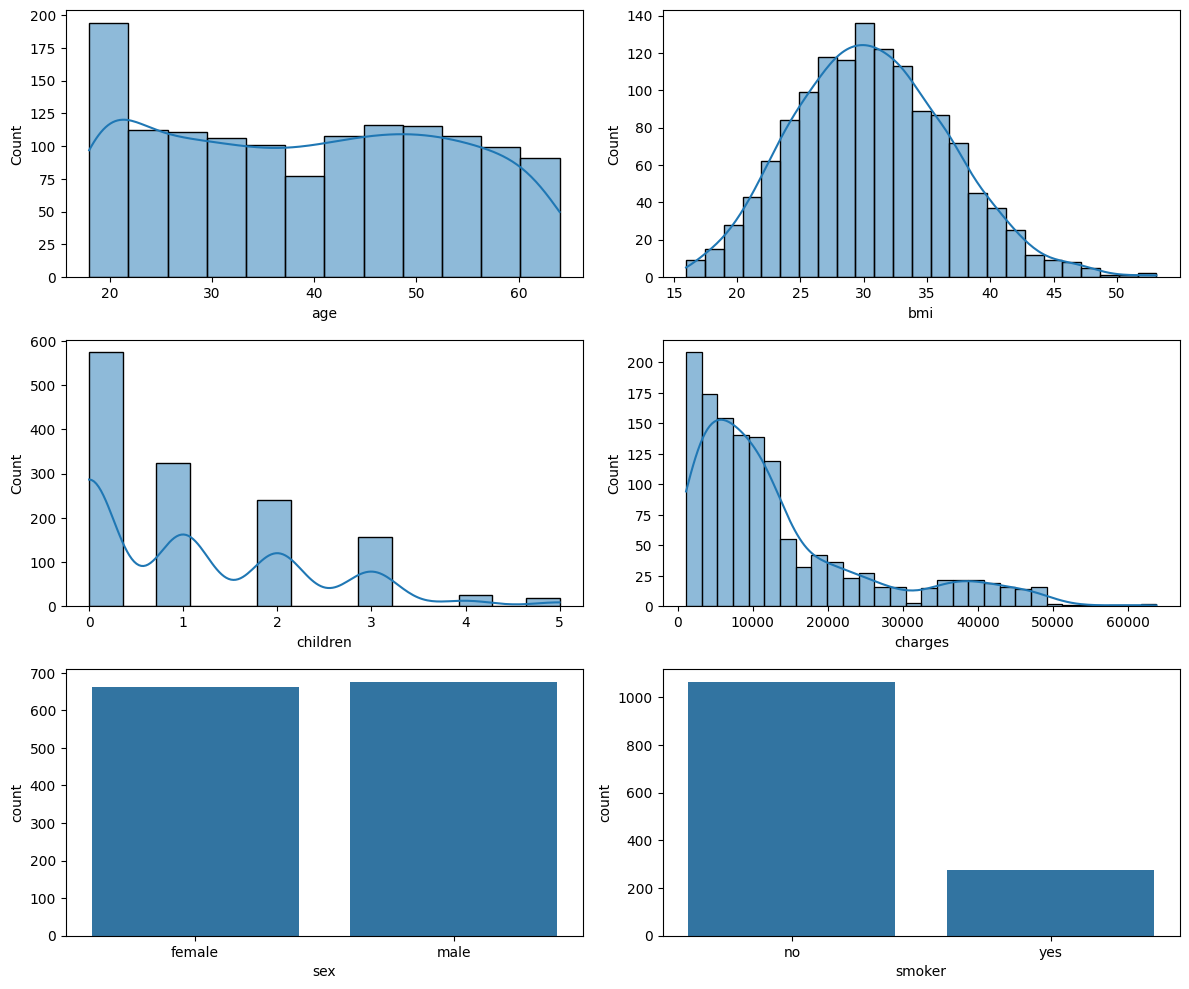

In [17]:
#Plot destributions of numerical values
fig, axes = plt.subplots(3, 2, figsize=(12,10))
sns.histplot(df['age'], kde=True, ax=axes[0,0])
sns.histplot(df['bmi'], kde=True, ax=axes[0, 1])
sns.histplot(df['children'], kde=True, ax=axes[1, 0])
sns.histplot(df['charges'], kde=True, ax=axes[1, 1])
sns.countplot(x='sex', data=df, ax=axes[2,0])
sns.countplot(x='smoker', data=df, ax=axes[2, 1])
plt.tight_layout()
plt.show()


#### Bivariate Analysis

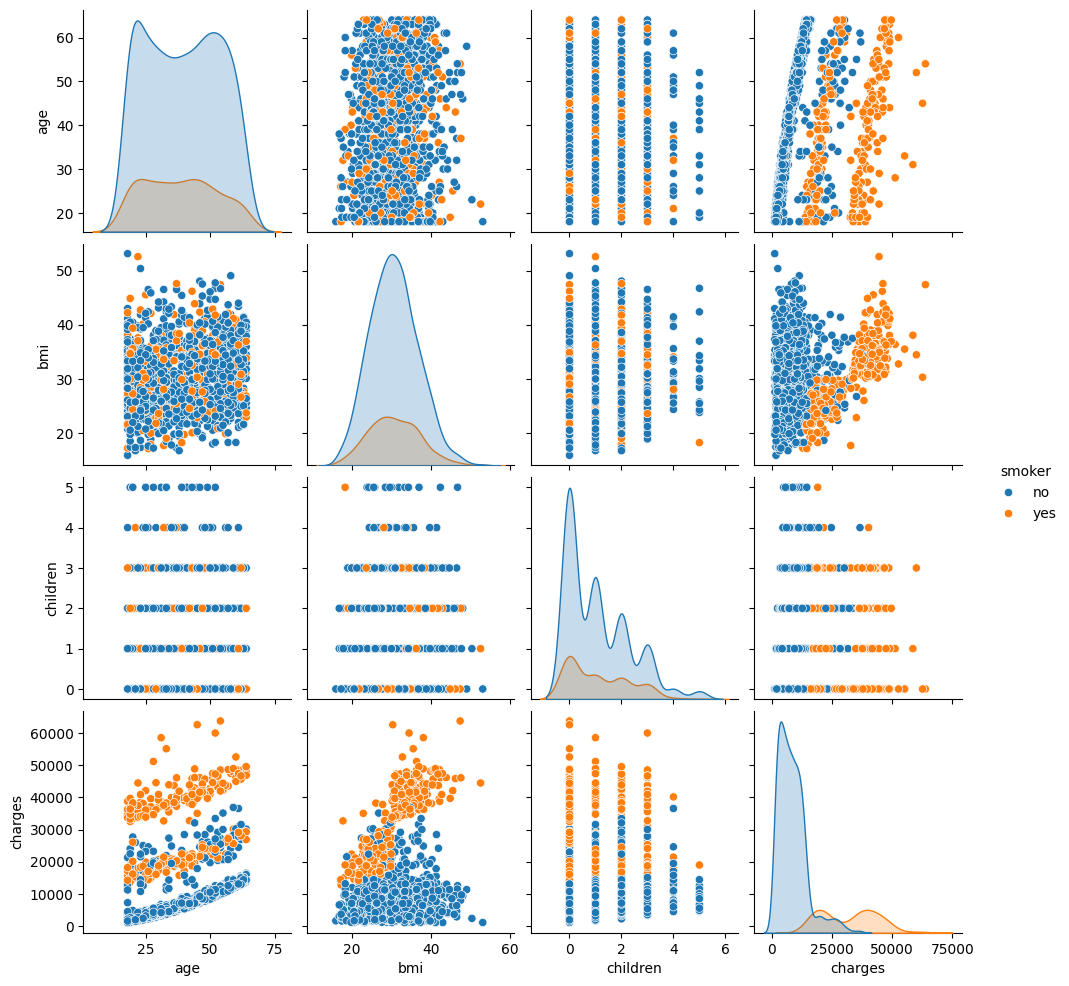

In [20]:
# Relationships between smoker variable and the rest of variables
sns.pairplot(df, hue='smoker')
plt.show()

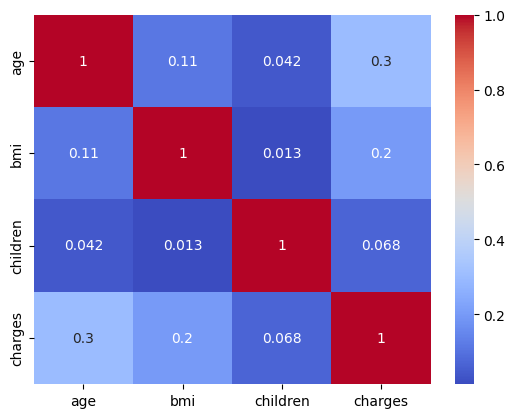

In [21]:
#Correlation matrix and heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### Multivariate Analysis

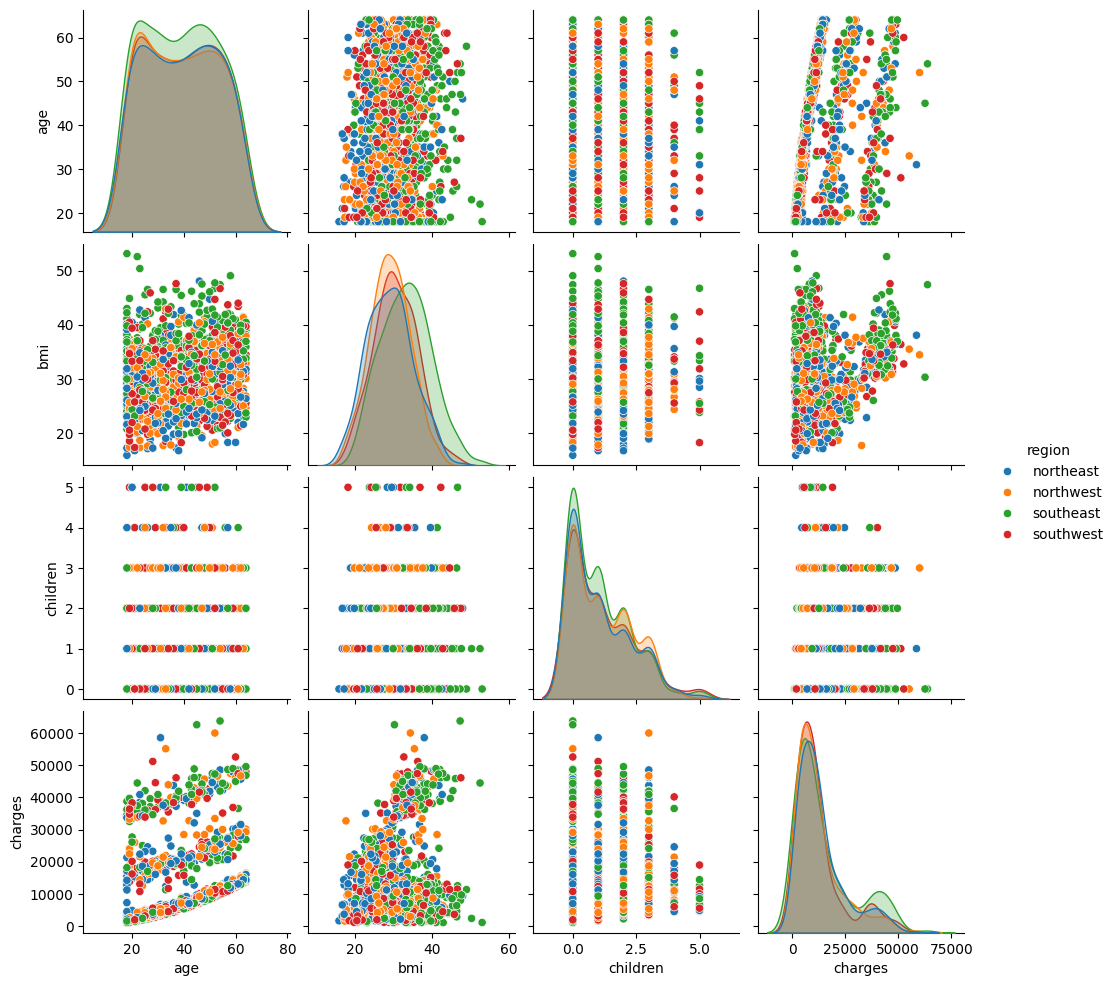

In [22]:
sns.pairplot(df, hue='region')
plt.show()

### Specific Analysis

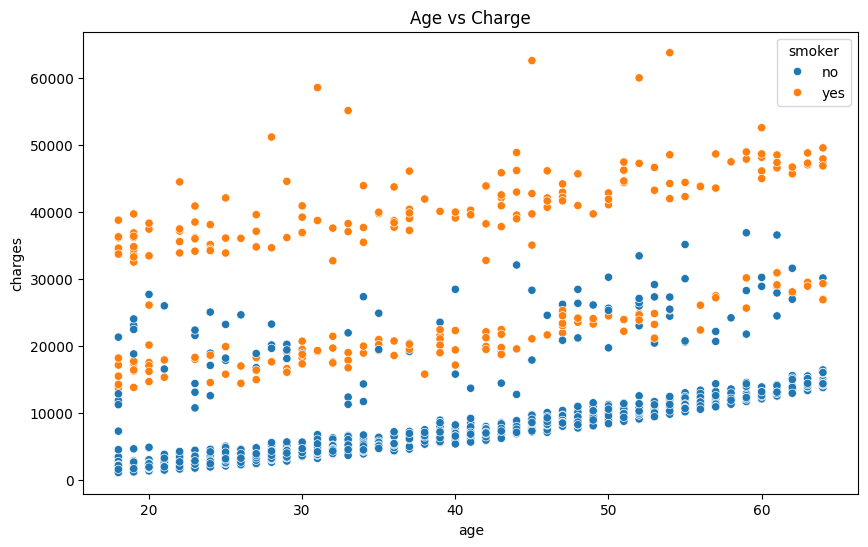

In [24]:
#Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Age vs Charge')
plt.show()

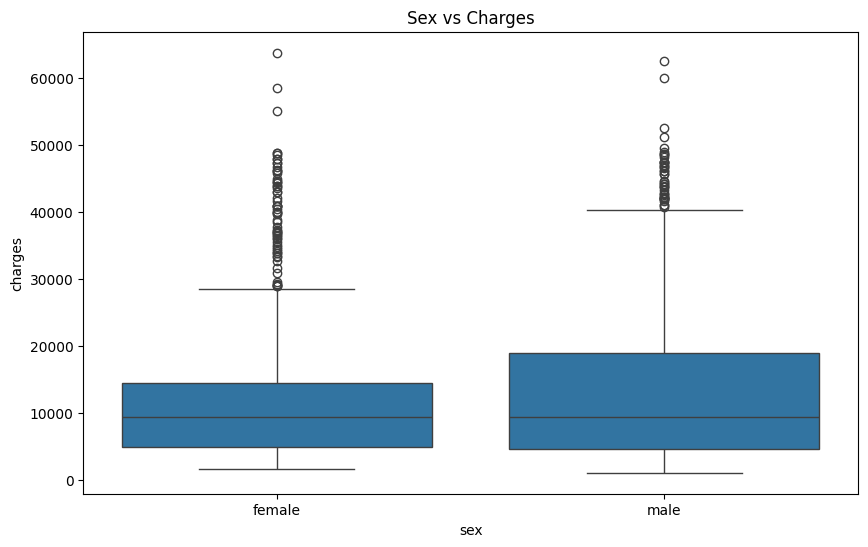

In [27]:
#Sex vs Charge
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.show()

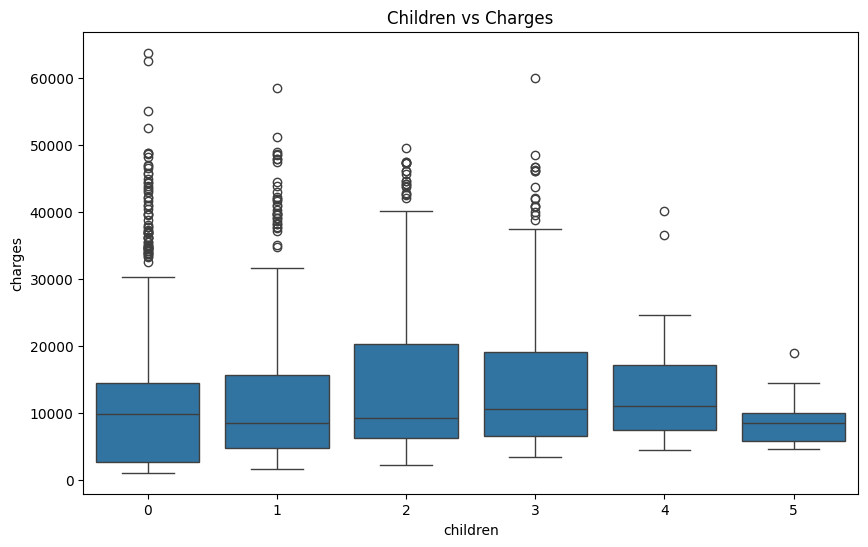

In [28]:
#Children vs Charges
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.show()

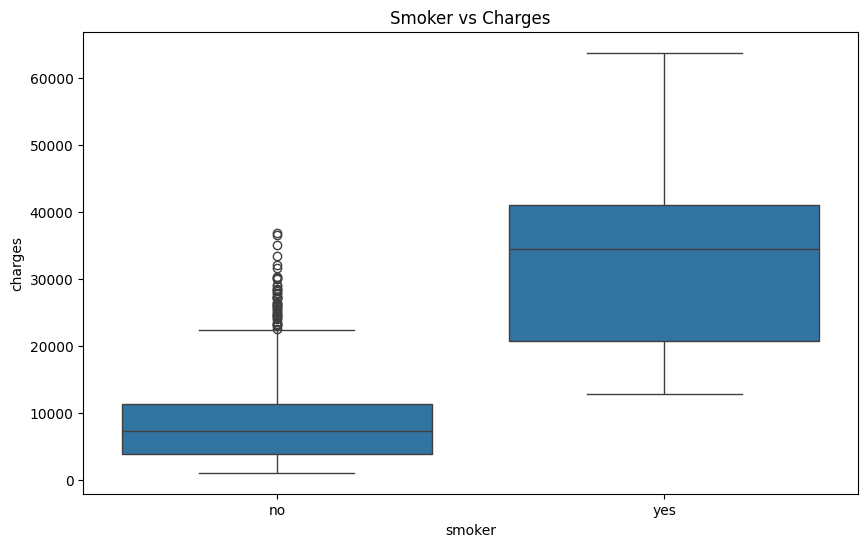

In [29]:
#Smoker vs. Charges
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()

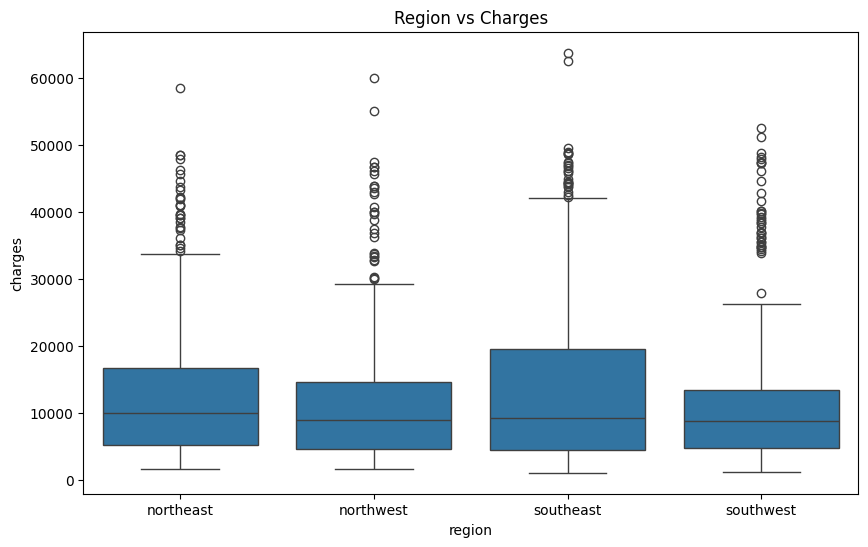

In [30]:
#Region vs Charges
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.show()


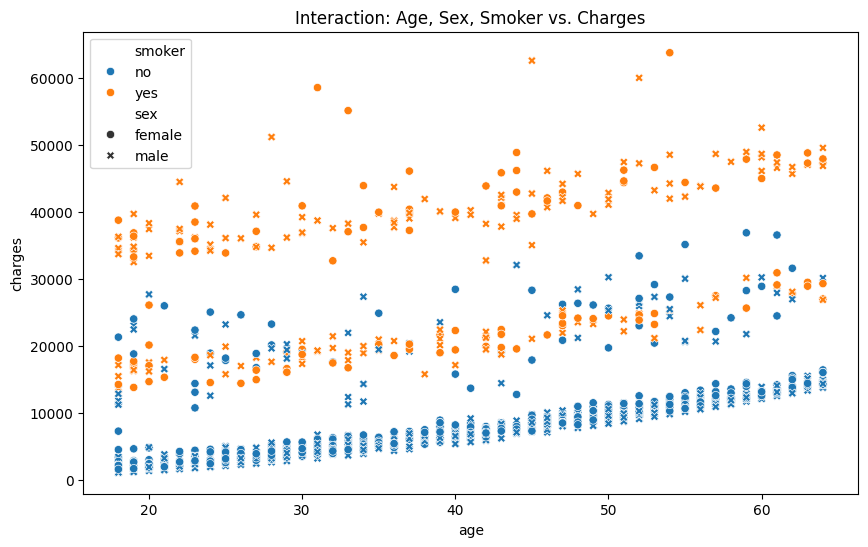

In [31]:
#Interaction Effects - Different vs of variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', style='sex', data=df)
plt.title('Interaction: Age, Sex, Smoker vs. Charges')
plt.show()

### Predictive Modeling

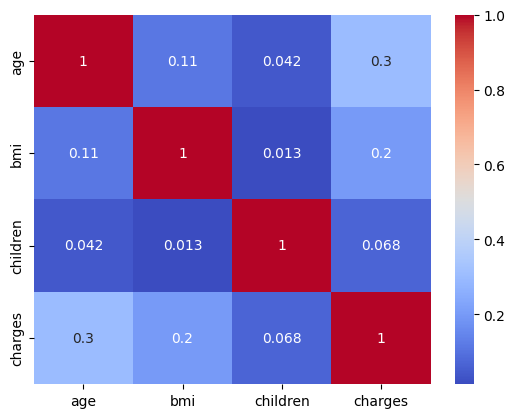

In [32]:
# Correlation Analysis
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [33]:
#Feature Selection
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
features.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


#### Model Building

In [35]:
#MODEL SET UP
    #Data split for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#INSTANTIATE MODELS
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

#MODEL TRAINING
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
gbr.fit(x_train, y_train)

#Models Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Predictions
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gbr = gbr.predict(x_test)

#Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print(f'Linear Regression MSE: {mse_lr}, MAE: {mae_lr}')
print(f'Random Forest MSE: {mse_rf}, MAE: {mae_rf}')
print(f'Gradient Boosting MSE: {mse_gbr}, MAE: {mae_gbr}')


Linear Regression MSE: 33596915.85136146, MAE: 4181.194473753654
Random Forest MSE: 20942520.922619622, MAE: 2550.0784706115096
Gradient Boosting MSE: 18745176.47586223, MAE: 2443.483262376879


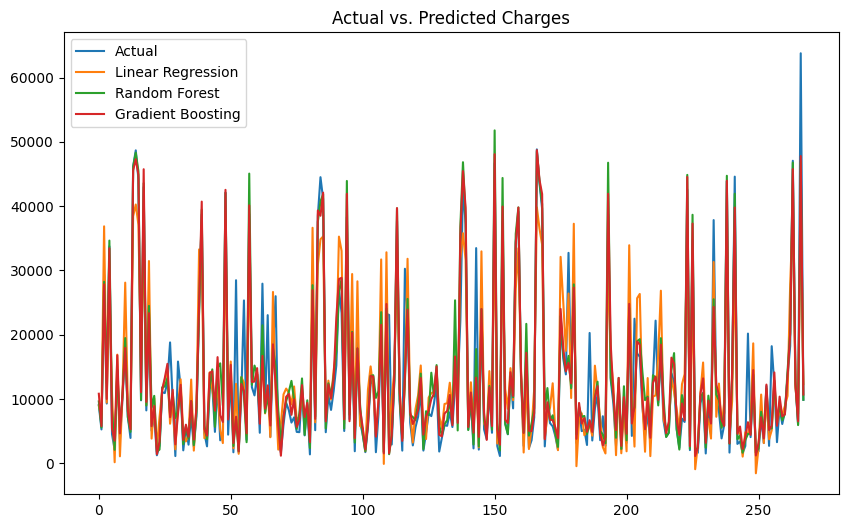

In [36]:
#Model Performance Comparison
# Compare model performance
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression')
plt.plot(y_pred_rf, label='Random Forest')
plt.plot(y_pred_gbr, label='Gradient Boosting')
plt.legend()
plt.title('Actual vs. Predicted Charges')
plt.show()
